In [4]:
#import dependencies
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [5]:
#read in file
industrial = pd.read_csv("Clean_Data/Industrial.csv")
industrial.head()

,DATE,INDPRO,Month,Year
0,2002-01-01,88.6706,1,2002
1,2002-02-01,88.6723,2,2002
2,2002-03-01,89.3624,3,2002
3,2002-04-01,89.7933,4,2002
4,2002-05-01,90.1629,5,2002


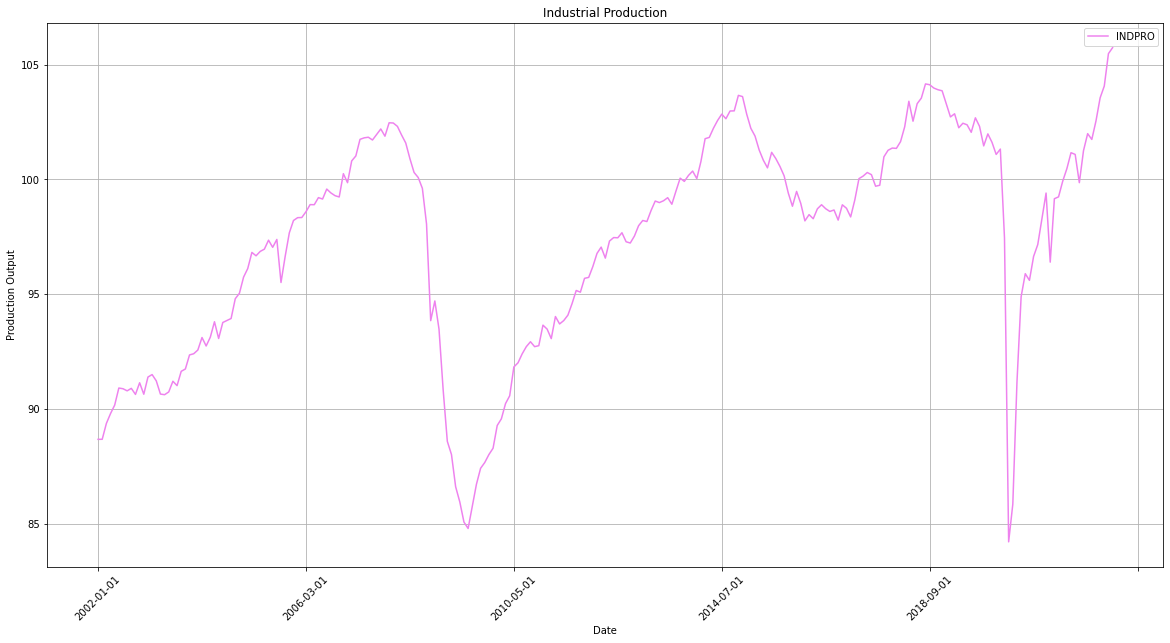

In [6]:
#plot data 
industrial.plot(x="DATE", y="INDPRO", color="violet", figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Production Output")
plt.title("Industrial Production")
plt.xticks(rotation=45)
plt.grid()

In [114]:
#read in inflation data
inflation = pd.read_csv("Clean_Data/inflation.csv")
# set index to year and change column types to integer
inflation.set_index("Year", inplace=True)
inflation.replace(np.nan, 0, inplace=True)
inflation.columns = inflation.columns.astype(int).tolist()
inflation.head()

,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2002,2.6,2.6,2.4,2.5,2.5,2.3,2.2,2.4,2.2,2.2,2.0,1.9
2003,1.9,1.7,1.7,1.5,1.6,1.5,1.5,1.3,1.2,1.3,1.1,1.1
2004,1.1,1.2,1.6,1.8,1.7,1.9,1.8,1.7,2.0,2.0,2.2,2.2
2005,2.3,2.4,2.3,2.2,2.2,2.0,2.1,2.1,2.0,2.1,2.1,2.2
2006,2.1,2.1,2.1,2.3,2.4,2.6,2.7,2.8,2.9,2.7,2.6,2.6


In [8]:
#read in retail data
retail = pd.read_csv("Clean_Data/Retail_Sales.csv")
retail.head()

,DATE,RSXFS,Year,Month
0,2002-01-01,256307,2002,1
1,2002-02-01,257670,2002,2
2,2002-03-01,257059,2002,3
3,2002-04-01,261333,2002,4
4,2002-05-01,257573,2002,5


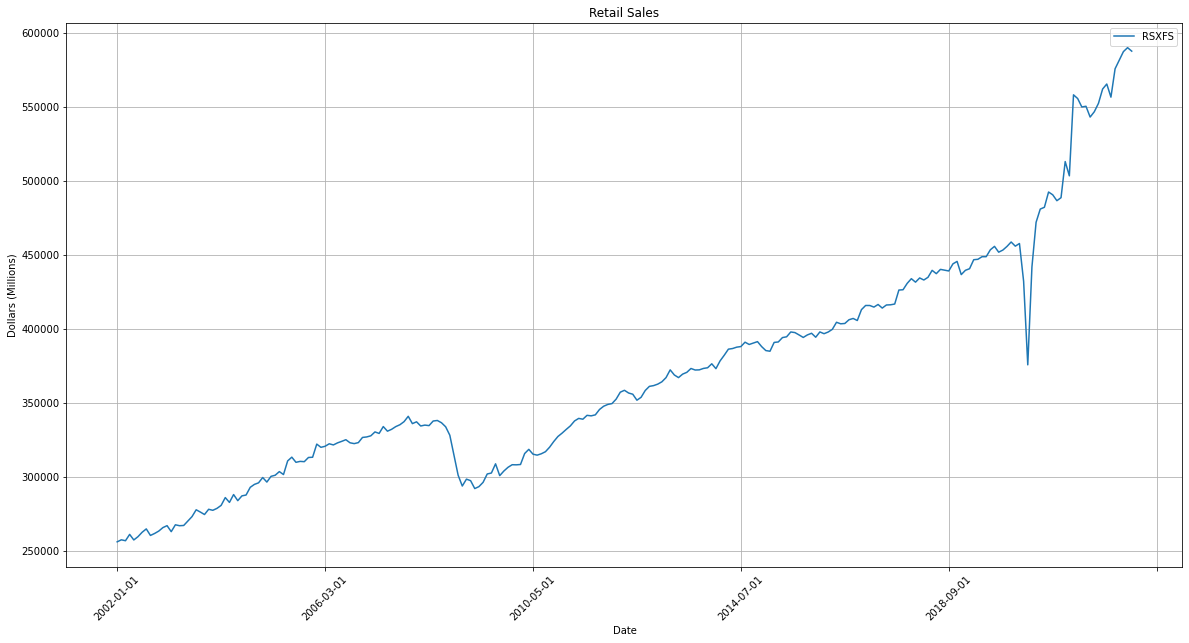

In [9]:
# plot retail data
retail.plot(x="DATE", y="RSXFS", figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Dollars (Millions)")
plt.title("Retail Sales")
plt.xticks(rotation=45)
plt.grid()

In [115]:
# read in unemployment data
unemploy = pd.read_csv("Clean_Data/Unemployment.csv")
# set index to year and change column types to integer
unemploy.set_index("Year", inplace=True)
unemploy.replace(np.nan, 0, inplace=True)
unemploy.columns = unemploy.columns.astype(int).tolist()
unemploy.head()

,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2002,5.7,5.7,5.7,5.9,5.8,5.8,5.8,5.7,5.7,5.7,5.9,6.0
2003,5.8,5.9,5.9,6.0,6.1,6.3,6.2,6.1,6.1,6.0,5.8,5.7
2004,5.7,5.6,5.8,5.6,5.6,5.6,5.5,5.4,5.4,5.5,5.4,5.4
2005,5.3,5.4,5.2,5.2,5.1,5.0,5.0,4.9,5.0,5.0,5.0,4.9
2006,4.7,4.8,4.7,4.7,4.6,4.6,4.7,4.7,4.5,4.4,4.5,4.4


In [18]:
#read in interest data 
interest = pd.read_csv("Clean_Data/clean_fedfunds.csv")
# change data types from int to string
interest["Month"] = interest["Month"].astype(str)
interest["Year"] = interest["Year"].astype(str)
# filter from 2002
interest = interest.loc[interest["Year"] >= "2002"]
interest.head()

,Year,Month,FEDFUNDS
570,2002,1,1.73
571,2002,2,1.74
572,2002,3,1.73
573,2002,4,1.75
574,2002,5,1.75


In [136]:
#change to integer 
interest["Month"] = interest["Month"].astype(int).tolist()

In [148]:
#iterate through interest data rows to create new date row in the form of YYYY-MM
date = []
for row, i in interest.iterrows():
    if i["Month"] < 10:
        date.append(f'{i["Year"]}-0{i["Month"]}')
    else:
        date.append(f'{i["Year"]}-{i["Month"]}')

In [150]:
# define new date column
interest["Date"] = date

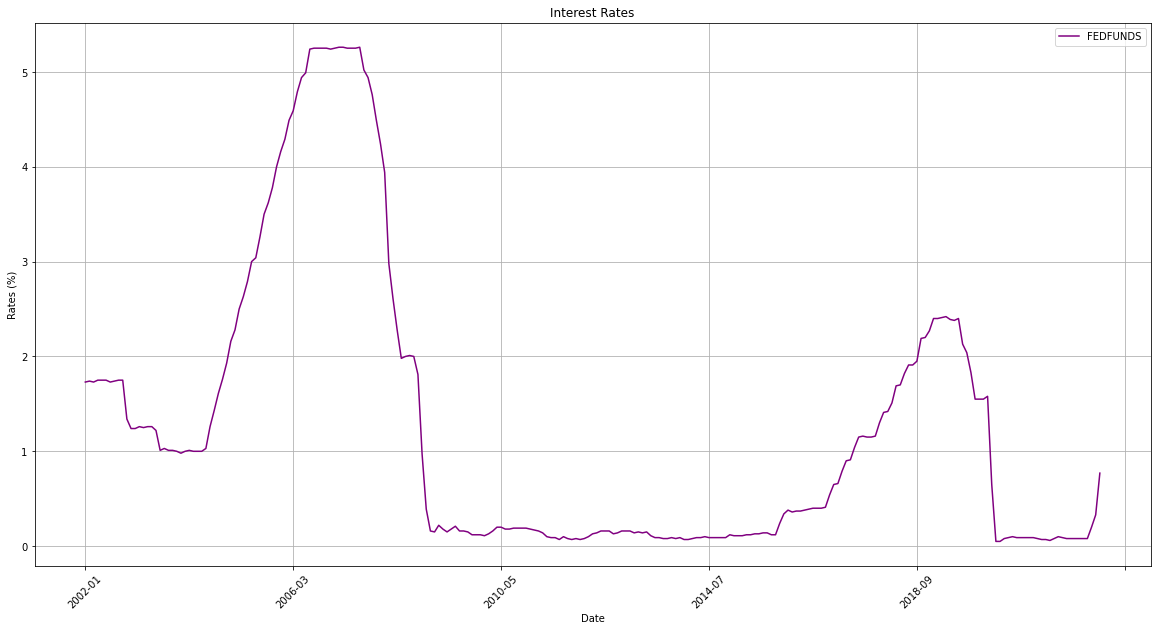

<Figure size 432x288 with 0 Axes>

In [206]:
# plot interest data
interest.plot(x="Date", y="FEDFUNDS", color="purple", figsize=(20, 10))
plt.xlabel("Date")
plt.ylabel("Rates (%)")
plt.title("Interest Rates")
plt.xticks(rotation=45)
plt.grid()
plt.show()
plt.show()

In [123]:
# function to iterate through inflation and unemployment datasets create new dataframe with index in the form of YYYY-MM and obtain the data for the column in order to plot the data 
inflation_dict = {}
unemployment_dict = {}
for i in inflation.index:
    for x in inflation.columns:
        if x < 10:
            inflation_dict[f"{i}-0{x}-01"] = inflation.loc[(inflation.index == i)][x].values[0]
            unemployment_dict[f"{i}-0{x}-01"] = unemploy.loc[(unemploy.index == i)][x].values[0]
        elif x >= 10: 
            inflation_dict[f"{i}-{x}-01"] = inflation.loc[(inflation.index == i)][x].values[0]
            unemployment_dict[f"{i}-{x}-01"] = unemploy.loc[(unemploy.index == i)][x].values[0]

In [203]:
#inflation
inflation_df = pd.DataFrame.from_dict(inflation_dict, orient="Index")
inflation_df.rename(columns={0:"Inflation"}, inplace=True)
inflation_df = inflation_df.loc[inflation_df.index < "2022-06"]

#unemploymnet
unemployment_df = pd.DataFrame.from_dict(unemployment_dict, orient="Index")
unemployment_df.rename(columns={0:"Unemployment"}, inplace=True)
unemployment_df = unemployment_df.loc[unemployment_df.index < "2022-06"]


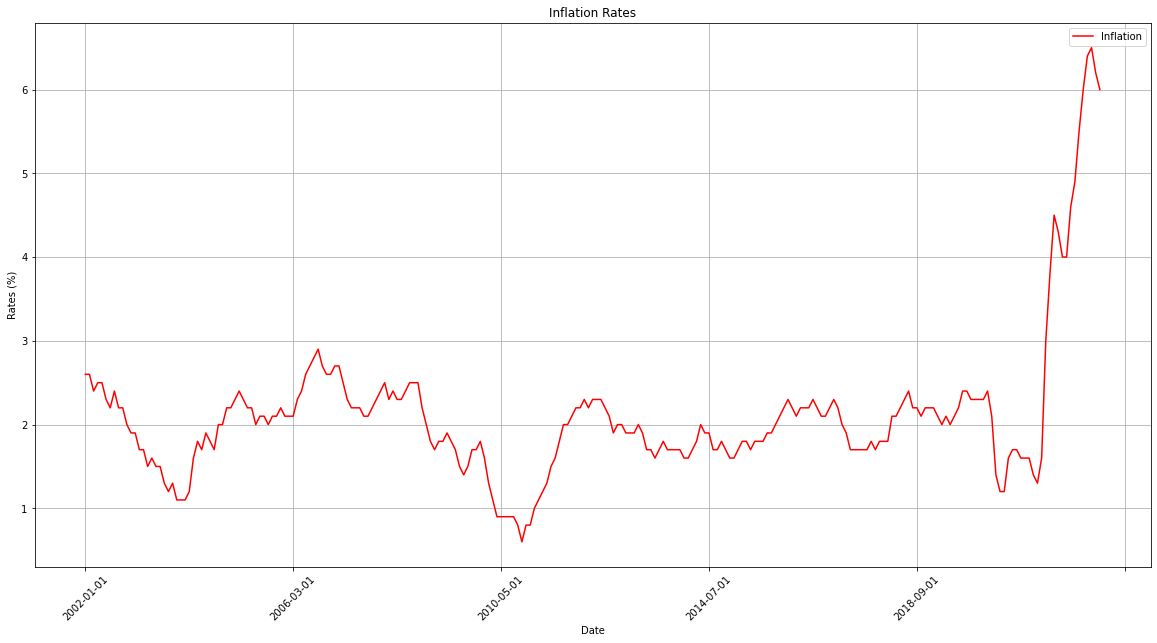

<Figure size 432x288 with 0 Axes>

In [204]:
#plot inflation data 
inflation_df.plot(y="Inflation", color='red', figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Rates (%)")
plt.title("Inflation Rates")
plt.xticks(rotation=45)
plt.grid()
plt.show()
plt.show()

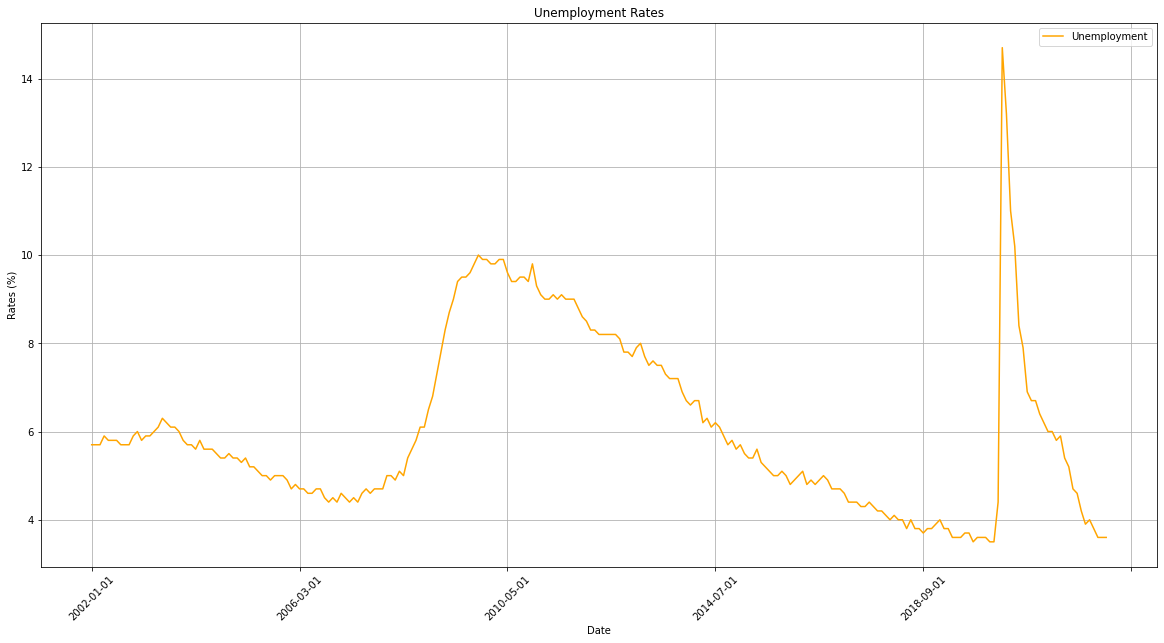

<Figure size 432x288 with 0 Axes>

In [201]:
#plot unemployment data 
unemployment_df.plot(y="Unemployment", color='orange', figsize=(20,10))
plt.xlabel("Date")
plt.ylabel("Rates (%)")
plt.title("Unemployment Rates")
plt.xticks(rotation=45)
plt.grid()
plt.show()